<a href="https://colab.research.google.com/github/xslittlemaggie/Other-ML-DL-Algorithm-notes/blob/master/ROC_AUC_Confusion_Matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center>模型性能评估<center><h1>

The purpose of this project is to practice the meanings, the difference of the below measurements:
- accuracy, 
- precision, 
- recall, 
- F1-score
- Roc
- AUC

<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 24px">
    <ol>
        <li><a href="#purpose of the study">错误率 VS 精度(accuracy)</a></li>
        <li><a href="#loading_data">准确率(Precision)</a></li>
        <li><a href="#features exploratory">召回率(Recall)</a></li>
        <li><a href="#data preprocessing">F1-score</a></li>
        <li><a href="#model building">ROC 曲线 VS AUC 指标</a></li>
    </ol>
</div>
<br>
<hr>

## 0. Import libraries

In [0]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_breast_cancer

# visualization
import matplotlib.pyplot as plt

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

## 1. load data

In [0]:
cancer = load_breast_cancer()
X = cancer.data
Y = cancer.target
columns = cancer.feature_names

In [3]:
data = pd.concat([pd.DataFrame(X, columns = columns), pd.DataFrame(Y, columns = ["label"])], axis = 1)
print(data.shape)
data.head()

(569, 31)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


1    357
0    212
Name: label, dtype: int64


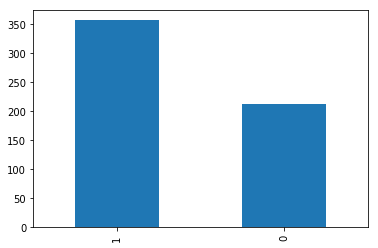

In [4]:
print(data["label"].value_counts())
data["label"].value_counts().plot(kind = "bar")
plt.show()

## 2. A little bit data preprocessing

- check missing values
- data standardization

In [0]:
#data.isnull().sum()

In [6]:
from sklearn.preprocessing import StandardScaler
scaled_X = StandardScaler().fit_transform(X)
X_df = pd.DataFrame(scaled_X)
df = pd.concat([pd.DataFrame(scaled_X, columns = columns), pd.DataFrame(cancer.target, columns = ["label"])], axis = 1)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,2.833031,2.487578,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,0
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,0.263327,0.742402,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,0
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,0.850928,1.181336,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,0
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,0.286593,-0.288378,0.689702,2.744280,0.819518,1.115007,4.732680,2.047511,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,0
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,1.273189,1.190357,1.483067,-0.048520,0.828471,1.144205,-0.361092,0.499328,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,0


## 3. Training, testing datasets split

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df["label"], test_size = 0.2, random_state = 30)

print("-" * 12 , "Training dataset", "-" * 12)
print("The shape of X training dataset: {}".format(x_train.shape))
print("The shape of Y training dataset: {}".format(y_train.shape))
print()
print("-" * 12 , "Testing dataset", "-" * 12)
print("The shape of X testing dataset: {}".format(x_test.shape))
print("The shape of Y testing dataset: {}".format(y_test.shape))

------------ Training dataset ------------
The shape of X training dataset: (455, 30)
The shape of Y training dataset: (455,)

------------ Testing dataset ------------
The shape of X testing dataset: (114, 30)
The shape of Y testing dataset: (114,)


## 4. Model creation and fitting

Since the purpose of this project is to practice the measurements above, I will not focus on model fine tuning.

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

lr = LogisticRegression()
lr.fit(x_train, y_train)
y_predict = lr.predict(x_test)
score = lr.score(x_test, y_test)
score

0.9824561403508771

## 5. Confusion matrix analysis

In [0]:
def plot_confusion_matrix(cm, title = "Confusion matrix", cmap = plt.cm.Wistia):
  """
  This function prints and plots the confusion matrix
  """
  plt.figure(figsize = (6, 6))
  plt.imshow(cm, interpolation = "nearest", cmap = plt.cm.Wistia) # plt.cm.Blues
  plt.title("Confusion Matrix", size = 14)
  plt.colorbar()
  tick_marks = np.arange(2) # len(classes)
  plt.xticks(tick_marks,rotation = 0)
  plt.yticks(tick_marks,rotation = 0)
  plt.xlabel('Predicted class', size = 12)
  plt.ylabel('True class', size = 12)
  s = [['TN','FP'], ['FN', 'TP']]
  for i in range(2):
    for j in range(2):
      plt.text(j, i, str(s[i][j]+ "=" + str(cm[i][j]) ), size = 10)
  plt.show()

### 5.1 Accuracy, Recall, Precision, F1-score

#### Accuracy: (TN + TP) /(TP + TN + FP + FN) = (43 + 69)/114 = 98.24%
- 这是一般会用到的评估方法，但是都要小心： 
  - 当数据非常不均匀的时候，例如， 90正例， 10 反例， 模型只需要把所有的例子都判定成正例， accuracy = 90%. 显然这个模型是不好的
  - 模型给与判定错和判定对同样的权重，例如， 在医院，把一个有癌症（Postive）人判定成没有癌症（FN）和把一个没有癌症的人（Negative）判定成有癌症（FP）的风险是完全不同的，这个时候我们需要尽可能的把所有有癌症的人全部判定错来（需要Recall 很高）

#### Recall (R): TP / (TP + FN) = 69/(69 + 1) = 98.57%
- 我们希望 FN 小

#### Precision (P): TP / (TP + FP) = 69/(69 + 1) = 98.57%
- 我们希望 FP 小

**High recall, low precision**: 表示我们把尽可能多的正例都判别出来了，但是有很多反例被判定成了正例， 在医学上，对recall的要求要很高

**Low recall, high precision**: 表示很多的正例都没有判别出来，但是很少的反例被判别成了正例


#### F1-score: 2 * P * R /(P + R) = 98.57%
use the Harmonic Mean in place of Arithmetic Mean as it punishes the extreme values more. The F-score will always be nearer to the smaller value of P or R.





### 这些值都很高， 看起来模型很不错


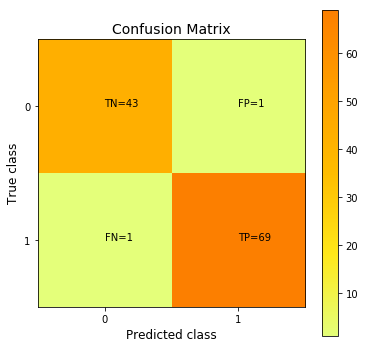

In [10]:
conf_matrix = confusion_matrix(y_test, y_predict)
plot_confusion_matrix(conf_matrix, cmap = plt.cm.Blues)

In [11]:
report = classification_report(y_test, y_predict, target_names = cancer.target_names)
print(report)

              precision    recall  f1-score   support

   malignant       0.98      0.98      0.98        44
      benign       0.99      0.99      0.99        70

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



### 5.2 ROC 曲线与AUC

AUC 的值 【0.5， 1】越接近1越好

### TPR (true positive rate) = Recall： 所有真实样本为1的样本中，预测为1 的比例
- Recall: TP / (TP + FN) = 69/(69 + 1) = 98.57%

### FPR (false positive rate): 所有真实样本为0的样本中，预测为1 的比例
- FP/(TN + FP) = 1/(43 + 1) = 2.27%

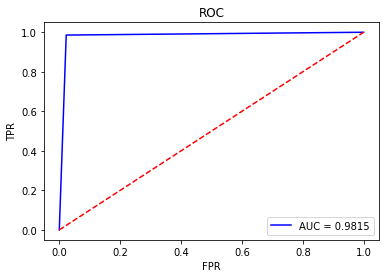

In [12]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(y_test, y_predict)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, "b", label = "AUC = %0.4f"%roc_auc)
plt.title("ROC")
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(loc = "best")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

### 5.3 Recall & Precision 曲线

In [16]:
confusion_matrix(y_test, y_predict)

array([[43,  1],
       [ 1, 69]])

## 6. Conclusion

The performance of this model is good from several aspects

- accuracy = 0.98

- recall = 0.98

- precision = 0.98

- F-1 score = 0.98

- auc = 0.98 